In [7]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pwd

'/home/wouter/Documents/Jupyter/NuCC'

In [61]:
file_name = "./input/run1/nucc_nu_overlay_run1_big_mcc9.root"
main_tree_name = "NuCCanalyzer"
file = uproot.open(file_name)[main_tree_name]
particles = file['Daughters']

In [62]:
cols = ['track_length', 'mc_pdg', 'mc_energy', 'mc_hit_fraction', 'mc_length']

In [63]:
df = particles.pandas.df(cols).query('mc_pdg==13')

In [64]:
mass = 0.105658
df['mc_mom'] = df.eval('sqrt(mc_energy**2 - (@mass)**2)')

([<matplotlib.axis.YTick at 0x7f4b7a0cad90>,
 <a list of 11 Text yticklabel objects>)

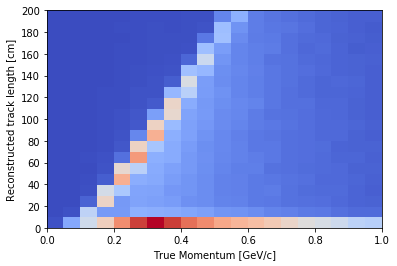

In [65]:
plt.hist2d(df['mc_mom'], df['track_length'], range=((0,1),(0,200)), bins=(20,20), cmap='coolwarm')
plt.xlabel('True Momentum [GeV/c]')
plt.ylabel('Reconstructed track length [cm]')
plt.yticks(np.arange(11)*20)

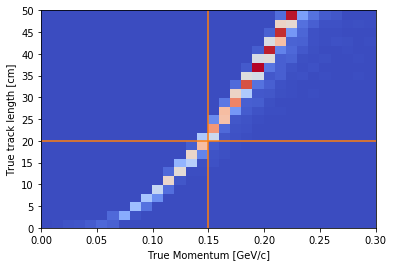

In [76]:
plt.hist2d(df['mc_mom'], df['mc_length'], range=((0,0.3),(0,50)), bins=(30,25), cmap='coolwarm')
plt.xlabel('True Momentum [GeV/c]')
plt.ylabel('True track length [cm]')
plt.yticks(np.arange(11)*5)
plt.axhline(y=20, c='C1')
plt.axvline(x=0.15, c='C1')
plt.savefig("muon_range_true_mom.pdf")